# Algoritmo de Wang-Landau

## Imports e Funções Auxiliares

### Imports

Imports de funções das bibliotecas

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

Importar as funções do script python que implementa o algoritmo de Wang-Landau, utilizando Numba, como recomendado. Há também funções auxiliares advindas da atividade anterior. Ao final do relatório, o script é apresentado na íntegra.

In [4]:
from wang import energy_ising, energy_scale, neighbours, random_energy_state

### Algoritmos de Propriedades Termodinâmicas

Os algoritmos utilizados na atividade anterior foram aqui adaptados para utilizar o logaritmo da densidade de estados.

In [47]:
def media_termo(lnG, N, beta):
    """
    Obtém as propriedades termodinâmicas a uma dada temperatura (com inverso beta),
    dada o logaritmo de energias por configuração (lnG)
    """
    Z = 0
    Em = 0
    Em2 = 0
    
    Emin = energy_scale(N,-2*N)
    Emax = energy_scale(N,2*N)
    
    for E in range(N):
        E1 = E - Emin
        Z = Z + np.exp(lnG[E])*np.exp(-beta*E1)
        
        Em = Em + E1*np.exp(lnG[E])*np.exp(-beta*E1)
        Em2 = Em2 + E1*E1*np.exp(lnG[E])*np.exp(-beta*E1)
    Em = Em/Z
    Em2 = Em2/Z
    
    Z = Z*np.exp(-beta*Emin)
    cv = (beta*beta*(Em2-Em**2))/N
    EpS = (Em + Emin)/N
    return Z, EpS, cv

In [48]:
def energia_livre_spin(Z, N, beta):
    """
    Calcula a energia livre por spin, usando a fórmula do enunciado.
    Note que a função np.log é o logaritmo natural.
    """
    result = N * beta
    result = -1/result
    result = result * np.log(Z)  # np.log é o logaritmo natural
    return result

In [49]:
def entropia_spin(e_spin, e_livre_spin, temp):
    """
    Calcula a entropia livre por spin, usando a fórmula do enunciado.
    Note que utiliza a temperatura e não o inverso dela (beta).
    """
    result = e_spin - e_livre_spin
    result = result / temp
    return result

## Simulações

Utilizando o script, mas invocando-o via shell do notebook, vamos simular para obter as redes 6x6, 12x12, 18x18 e 24x24. Estamos fazendo dessa forma pois houve problemas com o kernel do notebook.

In [35]:
%time !python wang.py 6

4114.29 3304.0 3304.0 3291.43 50000 1.52587890625e-05
24685.71 20056.0 20056.0 19748.57 150000 5.960464477539063e-08
Criado rede 6x6
CPU times: user 27.7 ms, sys: 33.4 ms, total: 61.1 ms
Wall time: 2.72 s


In [36]:
%time !python wang.py 12

134937.06 108860.0 108860.0 107949.65 460000 1.9073486328125e-06
18125.87 14727.0 14727.0 14500.7 610000 2.384185791015625e-07
Criado rede 12x12
CPU times: user 114 ms, sys: 38.1 ms, total: 152 ms
Wall time: 7.13 s


In [37]:
%time !python wang.py 18

10031.96 8431.0 8431.0 8025.57 10000 0.5
4012.38 3289.0 3289.0 3209.91 20000 0.0625
Criado rede 18x18
CPU times: user 294 ms, sys: 216 ms, total: 510 ms
Wall time: 26.4 s


In [38]:
%time !python wang.py 24

20035.78 16479.0 16479.0 16028.63 20000 0.5
68118.26 57626.0 57626.0 54494.61 340000 1.52587890625e-05
130226.09 109160.0 109160.0 104180.87 470000 7.62939453125e-06
Criado rede 24x24
CPU times: user 905 ms, sys: 357 ms, total: 1.26 s
Wall time: 1min 4s


## Resultados

### Carregamento do Arquivo

As redes foram salvas em arquivos do tipo _wangLxL.dict_ e _magLxL.dict_, com os $L$ correspondente. Vamos carregá-los para fazer algumas discussões

In [39]:
L = 6
lg6 = None
mmicro6 = None
with open(f"wang{L}x{L}.dict", "rb") as f:
    lg6 = pickle.load(f)
with open(f"mag{L}x{L}.dict", "rb") as f:
    mmicro6 = pickle.load(f)
    
L = 12
lg12 = None
mmicro12 = None
with open(f"wang{L}x{L}.dict", "rb") as f:
    lg12 = pickle.load(f)
with open(f"mag{L}x{L}.dict", "rb") as f:
    mmicro12 = pickle.load(f)

L = 18
lg18 = None
mmicro18 = None
with open(f"wang{L}x{L}.dict", "rb") as f:
    lg18 = pickle.load(f)
with open(f"mag{L}x{L}.dict", "rb") as f:
    mmicro18 = pickle.load(f)

L = 24
lg24 = None
mmicro24 = None
with open(f"wang{L}x{L}.dict", "rb") as f:
    lg24 = pickle.load(f)
with open(f"mag{L}x{L}.dict", "rb") as f:
    mmicro24 = pickle.load(f)

### Comparação com Enumeração Exata

Na atividade anterior, não foi possível executar a rede 6x6, pois demorava bastante. Naquele contexto, inseriu-se manualmente a solução exata. Nesse momento, com orientações do professor sobre algumas bibliotecas, como o Numba, não teve-se mais problemas com tempos de execução no algoritmo de Wang-Landau. Até para vermos o desempenho desse algoritmo frente à solução exata.

Vamos carregar, portanto, do mesmo arquivo da atividade passada, a rede 6x6 exata e comparar com o arquivo da rede 6x6 aproximada desse momento.

In [40]:
L = 6
N = L**2
g6 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g6 = pickle.load(f)

# Escalando-os usando a equação 
g6_scaled = np.zeros(N+1, dtype=np.float64)
for key,val in g6.items():
    i = energy_scale(N,key)
    g6_scaled[i] = val

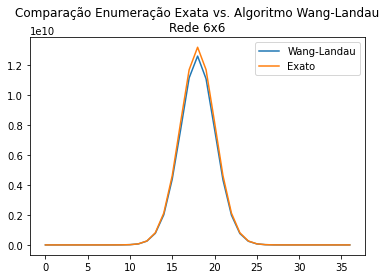

In [46]:
plt.plot(np.exp(lg6))
plt.plot(g6_scaled)
plt.legend(["Wang-Landau","Exato"])
plt.title("Comparação Enumeração Exata vs. Algoritmo Wang-Landau\nRede 6x6");

Como vimos na aula, o algoritmo de Wang-Landau, tendo como base o método de Monte Carlo, com quantidade suficiente de iterações, se aproxima bastante da enumeração exata. Esse resultado nos ratifica isso.

### Propriedades Termodinâmicas

In [53]:
# Geração dos dados
x_6 = []
y1_6 = []
y2_6 = []
y3_6 = []
y4_6 = []

x_12 = []
y1_12 = []
y2_12 = []
y3_12 = []
y4_12 = []

x_18 = []
y1_18 = []
y2_18 = []
y3_18 = []
y4_18 = []

x_24 = []
y1_24 = []
y2_24 = []
y3_24 = []
y4_24 = []

step = 0.01
t_min = 1
t_max = 5

for temp in np.arange(t_min,t_max,step):
    beta = 1/temp
    
    # 6x6
    N = 6**2
    Z, EpS, cv = media_termo(lg6, N, beta)
    x_6.append(temp)
    y1_6.append(EpS)  # Energia por spin
    y2_6.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_6.append(liv_spin)   # Energia livre por spin
    y4_6.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

    # 12x12
    N = 12**2
    Z, EpS, cv = media_termo(lg12, N, beta)
    x_12.append(temp)
    y1_12.append(EpS)  # Energia por spin
    y2_12.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_12.append(liv_spin)   # Energia livre por spin
    y4_12.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 18x18
    N = 18**2
    Z, EpS, cv = media_termo(lg18, N, beta)
    x_18.append(temp)
    y1_18.append(EpS)  # Energia por spin
    y2_18.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_18.append(liv_spin)   # Energia livre por spin
    y4_18.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 24x24
    N = 24**2
    Z, EpS, cv = media_termo(lg24, N, beta)
    x_24.append(temp)
    y1_24.append(EpS)  # Energia por spin
    y2_24.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_24.append(liv_spin)   # Energia livre por spin
    y4_24.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

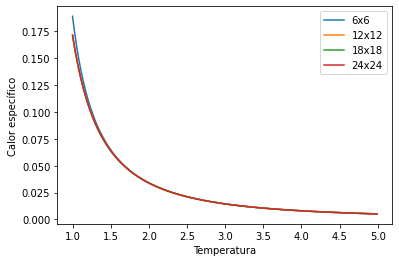

In [58]:
# Plot Calor Específico
plt.plot(x_6 ,y2_6 )
plt.plot(x_12,y2_12)
plt.plot(x_18,y2_18)
plt.plot(x_24,y2_24)
plt.ylabel("Calor específico")
plt.xlabel("Temperatura")
plt.legend(["6x6","12x12","18x18","24x24"])
plt.show()

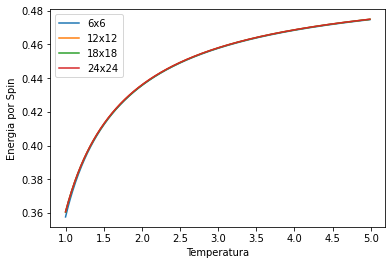

In [59]:
# Plot Energia por Spin
plt.plot(x_6 ,y1_6 )
plt.plot(x_12,y1_12)
plt.plot(x_18,y1_18)
plt.plot(x_24,y1_24)
plt.ylabel("Energia por Spin")
plt.xlabel("Temperatura")
plt.legend(["6x6","12x12","18x18","24x24"])
plt.show()

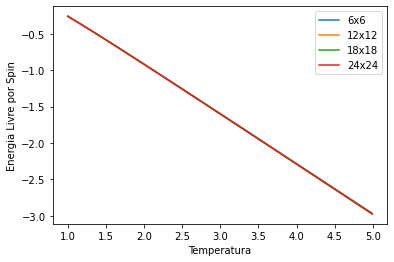

In [60]:
# Plot Energia Livre por Spin
plt.plot(x_6 ,y3_6 )
plt.plot(x_12,y3_12)
plt.plot(x_18,y3_18)
plt.plot(x_24,y3_24)
plt.ylabel("Energia Livre por Spin")
plt.xlabel("Temperatura")
plt.legend(["6x6","12x12","18x18","24x24"])
plt.show()

# OFF

Além desses, temos também algoritmos para achar o mínimo de um vetor, desconsiderando o segundo e o último itens, para escalar a energia com base na equação fornecida no enunciado e para gerar uma configuração aleatória para o sistema

In [5]:
N = 36
s = random_energy_state(N)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
# E = energy_scale(N,E)
# lnG, mmicro = wang_landau(N, E, s)
E

-4.0

## Algoritmo
Implementação do algoritmo de Wang-Landau, tendo como base o algoritmo visto em aula e também o pseudocódigo do enunciado

###  Comparação com Rede 6x6

Nesse momento, vmoas comparar os resultados do algoritmo implementado com a rede 6x6 exata feita manualmente na atividade anterior. 

In [25]:
N = 36
s = random_energy_state(N)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lnG, mmicro = wang_landau(N, E, s)

1.03 0.0 0.0 0.82 0 1.0
1029.6 932.0 932.0 823.68 1000 1.0
1028.57 978.0 978.0 822.86 2000 0.5
1028.57 964.0 964.0 822.86 3000 0.25
1028.57 963.0 963.0 822.86 4000 0.125
1028.57 923.0 923.0 822.86 5000 0.0625
1028.57 968.0 968.0 822.86 6000 0.03125
1028.57 884.0 884.0 822.86 7000 0.015625
1028.57 889.0 889.0 822.86 8000 0.0078125
1028.57 641.0 641.0 822.86 9000 0.00390625
2057.14 1861.0 1861.0 1645.71 10000 0.00390625
1028.57 518.0 518.0 822.86 11000 0.001953125
2057.14 1532.0 1532.0 1645.71 12000 0.001953125
3085.71 2641.0 2641.0 2468.57 13000 0.001953125
1028.57 573.0 573.0 822.86 14000 0.0009765625
2057.14 1384.0 1384.0 1645.71 15000 0.0009765625
3085.71 2394.0 2394.0 2468.57 16000 0.0009765625
4114.29 3558.0 3558.0 3291.43 17000 0.0009765625
1028.57 484.0 484.0 822.86 18000 0.00048828125
2057.14 1532.0 1532.0 1645.71 19000 0.00048828125
3085.71 2797.0 2797.0 2468.57 20000 0.00048828125
1028.57 563.0 563.0 822.86 21000 0.000244140625
2057.14 1553.0 1553.0 1645.71 22000 0.00024414062

É possível comparar os resultados (após tomarmos a exponencial) com os dados obtidos de forma exata manualmente anteriormente.

In [26]:
lnG

array([ 6.93147181e-01, -2.05850510e+03,  4.29915975e+00,  4.98911252e+00,
        7.42057881e+00,  8.72623922e+00,  1.04889996e+01,  1.20045184e+01,
        1.36179501e+01,  1.51833401e+01,  1.67002407e+01,  1.81158441e+01,
        1.94101114e+01,  2.05359288e+01,  2.15197909e+01,  2.22720567e+01,
        2.28499395e+01,  2.32010696e+01,  2.33020651e+01,  2.31867170e+01,
        2.28364093e+01,  2.22817446e+01,  2.14987891e+01,  2.05435968e+01,
        1.94102790e+01,  1.81156173e+01,  1.66799844e+01,  1.51675738e+01,
        1.36128318e+01,  1.19887774e+01,  1.04966173e+01,  8.74042618e+00,
        7.42264989e+00,  5.05104217e+00,  4.34752713e+00, -2.05850510e+03,
        7.53078042e-01])

In [4]:
# Escalando as energias da solução exata para comparação
# Carregando do arquivo
import pickle
# 6x6
L = 6
N = L**2
g6 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g6 = pickle.load(f)

# Escalando-os usando a equação 
g6_scaled = np.zeros(N+1, dtype=np.float64)
for key,val in g6.items():
    i = energy_scale(N,key)
    g6_scaled[i] = val

NameError: name 'energy_scale' is not defined

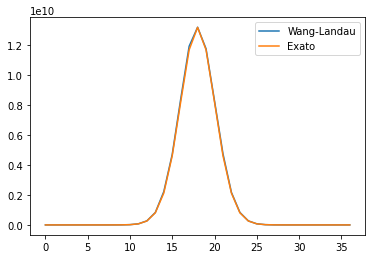

In [28]:
plt.plot(np.exp(lnG))
plt.plot(g6_scaled)
plt.legend(["Wang-Landau","Exato"])

Tendo em vista alguma demora dos algoritmos no ambiente do notebook, implementou-se o algoritmo de Wang-Landau num script separado em Python, que foi executado separadamente. Os resultados das simulações foram gravados em arquivos e serão usados no notebook

## Propriedades Termodinâmicas
Agora, temos que adaptar os algoritmos que obtêm as propriedades termodinâmicas para utilizar o logaritmo de $g(E)$ ao invés do valor em si.

## Simulações

In [32]:
CREATE_ARRAYS = True

In [33]:
L = 6
N = L**2

if CREATE_ARRAYS:
    s = random_energy_state(N)
    viz = neighbours(N,np.sqrt(N))
    E = energy_ising(s,viz)
    E = energy_scale(N,E)
    lg6, mmicro6 = wang_landau(N, E, s)
    with open(f"wang{L}x{L}.dict", "wb") as f:
        pickle.dump(lg6, f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        pickle.dump(mmicro6, f)
    print(f"Criado rede {L}x{L}")
else:
    lg6 = None
    mmicro6 = None
    with open(f"wang{L}x{L}.dict", "rb") as f:
        lg6 = pickle.load(f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        mmicro6 = pickle.load(f)

1.03 0.0 0.0 0.82 0 1.0
1029.6 910.0 910.0 823.68 1000 1.0
1028.57 849.0 849.0 822.86 2000 0.5
1028.57 872.0 872.0 822.86 3000 0.25
1028.57 917.0 917.0 822.86 4000 0.125
1028.57 915.0 915.0 822.86 5000 0.0625
1028.57 896.0 896.0 822.86 6000 0.03125
1028.57 870.0 870.0 822.86 7000 0.015625
1028.57 785.0 785.0 822.86 8000 0.0078125
2057.14 1849.0 1849.0 1645.71 9000 0.0078125
1028.57 804.0 804.0 822.86 10000 0.00390625
2057.14 1633.0 1633.0 1645.71 11000 0.00390625
3085.71 2799.0 2799.0 2468.57 12000 0.00390625
1028.57 781.0 781.0 822.86 13000 0.001953125
2057.14 1844.0 1844.0 1645.71 14000 0.001953125
1028.57 542.0 542.0 822.86 15000 0.0009765625
2057.14 1398.0 1398.0 1645.71 16000 0.0009765625
3085.71 2522.0 2522.0 2468.57 17000 0.0009765625
1028.57 505.0 505.0 822.86 18000 0.00048828125
2057.14 1243.0 1243.0 1645.71 19000 0.00048828125
3085.71 2195.0 2195.0 2468.57 20000 0.00048828125
4114.29 3013.0 3013.0 3291.43 21000 0.00048828125
5142.86 4193.0 4193.0 4114.29 22000 0.00048828125
1

In [ ]:
L = 12
N = L**2

if CREATE_ARRAYS:
    s = random_energy_state(N)
    viz = neighbours(N,np.sqrt(N))
    E = energy_ising(s,viz)
    E = energy_scale(N,E)
    lg12, mmicro12 = wang_landau(N, E, s)
    print("Aqui")
    with open(f"wang{L}x{L}.dict", "wb") as f:
        pickle.dump(lg12, f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        pickle.dump(mmicro12, f)
    print(f"Criado rede {L}x{L}")
else:
    lg12 = None
    mmicro12 = None
    with open(f"wang{L}x{L}.dict", "rb") as f:
        lg12 = pickle.load(f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        mmicro12 = pickle.load(f)

In [48]:
L = 18
N = L**2

if CREATE_ARRAYS:
    s = random_energy_state(N)
    viz = neighbours(N,np.sqrt(N))
    E = energy_ising(s,viz)
    E = energy_scale(N,E)
    lg18, mmicro18 = wang_landau(N, E, s)
    with open(f"wang{L}x{L}.dict", "wb") as f:
        pickle.dump(lg18, f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        pickle.dump(mmicro18, f)
    print(f"Criado rede {L}x{L}")
else:
    lg18 = None
    mmicro18 = None
    with open(f"wang{L}x{L}.dict", "rb") as f:
        lg18 = pickle.load(f)
    with open(f"mag{L}x{L}.dict", "wb") as f:
        mmicro18 = pickle.load(f)

NameError: name 'CREATE_ARRAYS' is not defined

In [79]:
np.exp(lg2)

array([ 2.        ,  0.        , 11.88402237,  0.        ,  1.95488067])

In [71]:
N = 16
s = random_energy_state(N)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lg4, mmicro4 = wang_landau(N, E, s)

hmed=1.07, hmin=0, flat_condition:0>0.85, i=0, lnf=1.0
hmed=1067.73, hmin=1038, flat_condition:1038>854.19, i=1000, lnf=1.0
hmed=1066.67, hmin=1036, flat_condition:1036>853.33, i=2000, lnf=0.5
hmed=1066.67, hmin=1047, flat_condition:1047>853.33, i=3000, lnf=0.25
hmed=1066.67, hmin=1026, flat_condition:1026>853.33, i=4000, lnf=0.125
hmed=1066.67, hmin=1023, flat_condition:1023>853.33, i=5000, lnf=0.0625
hmed=1066.67, hmin=1030, flat_condition:1030>853.33, i=6000, lnf=0.03125
hmed=1066.67, hmin=896, flat_condition:896>853.33, i=7000, lnf=0.015625
hmed=1066.67, hmin=979, flat_condition:979>853.33, i=8000, lnf=0.0078125
hmed=1066.67, hmin=967, flat_condition:967>853.33, i=9000, lnf=0.00390625
hmed=1066.67, hmin=808, flat_condition:808>853.33, i=10000, lnf=0.001953125
hmed=2133.33, hmin=1937, flat_condition:1937>1706.67, i=11000, lnf=0.001953125
hmed=1066.67, hmin=845, flat_condition:845>853.33, i=12000, lnf=0.0009765625
hmed=2133.33, hmin=1790, flat_condition:1790>1706.67, i=13000, lnf=0.0

<ipython-input-28-6b9aaef1e1b4>:68: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


In [78]:
np.exp(lg4)

array([2.00000000e+00, 0.00000000e+00, 3.35853218e+01, 6.79451340e+01,
       4.13862716e+02, 1.70490081e+03, 6.77959077e+03, 1.30949052e+04,
       2.01693406e+04, 1.36448987e+04, 6.66280603e+03, 1.75141866e+03,
       4.33511066e+02, 6.40067749e+01, 3.22210792e+01, 0.00000000e+00,
       2.00810964e+00])

In [41]:
N = 36
s = random_energy_state(N)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lg6, mmicro6 = wang_landau(N, E, s)

hmed=1.0285714285714285, hmin=0, flat_condition:0>0.8228571428571428
hmed=103.88571428571429, hmin=110, flat_condition:110>83.10857142857144
H=[  0   0  51  61  70  81  88  93 122 124 126 132 134 136 140 138 145 146
 152 148 143 146 142 139 128 121  90  84  77  77  76  71  68  63  65   0
  59], Hc=[  0   0  51  61  70  81  88  93 122 124 126 132 134 136 140 138 145 146
 152 148 143 146 142 139 128 121  90  84  77  77  76  71  68  63  65   0
  59]
0.5
hmed=102.85714285714286, hmin=0, flat_condition:0>82.28571428571429
hmed=205.71428571428572, hmin=0, flat_condition:0>164.57142857142858
hmed=308.57142857142856, hmin=1956, flat_condition:1956>246.85714285714286
H=[1956    0   37   11   71   11 6547 2026    3   69   51    0    8   10
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[1956    0   37   11   71   11 6547 2026    3   69   51    0    8   10
    0    0    0    0    0    0    0    0    0    0    0    0    0  

hmed=102.85714285714286, hmin=3600, flat_condition:3600>82.28571428571429
H=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
9.5367431640625e-07
hmed=102.85714285714286, hmin=3600, flat_condition:3600>82.28571428571429
H=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
4.76837158203125e-07
hmed=102.85714285714286, hmin=3600, flat_co

<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: divide by zero encountered in true_divide
  mmicro = mmicro/Hc
<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


In [73]:
lg6, mmicro6 = lnG, mmicro

## Resultados

In [52]:
# Geração dos dados
x_6 = []
y1_6 = []
y2_6 = []
y3_6 = []
y4_6 = []

x_12 = []
y1_12 = []
y2_12 = []
y3_12 = []
y4_12 = []

x_18 = []
y1_18 = []
y2_18 = []
y3_18 = []
y4_18 = []

x_24 = []
y1_24 = []
y2_24 = []
y3_24 = []
y4_24 = []

step = 0.01
t_min = 1
t_max = 5

for temp in np.arange(t_min,t_max,step):
    beta = 1/temp
    
    # 6x6
    N = 6**2
    Z, EpS, cv = media_termo(lg6, N, beta)
    x_6.append(temp)
    y1_6.append(EpS)  # Energia por spin
    y2_6.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_6.append(liv_spin)   # Energia livre por spin
    y4_6.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

    # 12x12
    N = 12**2
    Z, EpS, cv = media_termo(lg12, N, beta)
    x_12.append(temp)
    y1_12.append(EpS)  # Energia por spin
    y2_12.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_12.append(liv_spin)   # Energia livre por spin
    y4_12.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 18x18
    N = 18**2
    Z, EpS, cv = media_termo(lg18, N, beta)
    x_18.append(temp)
    y1_18.append(EpS)  # Energia por spin
    y2_18.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_18.append(liv_spin)   # Energia livre por spin
    y4_18.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 24x24
    N = 24**2
    Z, EpS, cv = media_termo(lg24, N, beta)
    x_24.append(temp)
    y1_24.append(EpS)  # Energia por spin
    y2_24.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_24.append(liv_spin)   # Energia livre por spin
    y4_24.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

## Médias Termdinâmicas Exatas

In [2]:
import pickle

# Carregar do arquivo
# 2x2
L = 2
N = L**2
g2 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g2 = pickle.load(f)

# 4x4
L = 4
N = L**2
g4 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g4 = pickle.load(f)

# 6x6
L = 6
N = L**2
g6 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g6 = pickle.load(f)

In [3]:
print(g2)
print(g4)
print(g6)

{-8: 2, -4: 0, 0: 12, 4: 0, 8: 2}
{-32: 2, -28: 0, -24: 32, -20: 64, -16: 424, -12: 1728, -8: 6688, -4: 13568, 0: 20524, 4: 13568, 8: 6688, 12: 1728, 16: 424, 20: 64, 24: 32, 28: 0, 32: 2}
{-72: 2, -68: 0, -64: 72, -60: 144, -56: 1620, -52: 6048, -48: 35148, -44: 159840, -40: 804078, -36: 3846576, -32: 17569080, -28: 71789328, -24: 260434986, -20: 808871328, -16: 2122173684, -12: 4616013408, -8: 8196905106, -4: 11674988208, 0: 13172279424, 4: 11674988208, 8: 8196905106, 12: 4616013408, 16: 2122173684, 20: 808871328, 24: 260434986, 28: 71789328, 32: 17569080, 36: 3846576, 40: 804078, 44: 159840, 48: 35148, 52: 6048, 56: 1620, 60: 144, 64: 72, 68: 0, 72: 2}


In [ ]:
# Normalize g2 energy
g2_escaled

In [8]:
lg2 = np.log(g2, where=g2>0)
lg2

TypeError: '>' not supported between instances of 'dict' and 'int'

In [3]:
%load exact_ising.py neighbours
import numpy as np

def neighbours(N, L):
    """
    Constrói a matriz de vizinhança.
    Assume que há uma "vizinhança circular" como se a rede 
    fosse um toro.
    Adaptação do algoritmo proposto no enunciado
    """
    # Cria uma matriz Nx4
    viz = np.zeros((N,4), dtype=np.longlong)

    # (k,0): vizinho à direita
    # (k,1): vizinho acima
    # (k,2): vizinho à esquerda
    # (k,3): vizinho abaixo]
    for k in range(N):
        # Vizinho à direita (k,0)
        viz[k][0] = k+1
        if (k % L == L-1):
            # Sítio na borda da direita
            viz[k][0] = k+1-L

        # Vizinho acima (k,1)
        viz[k][1] = k+L
        if (k >= N-L):
            # Sítio na borda superior
            viz[k][1] = k+L-N

        # Vizinho à esquerda (k,2)
        viz[k][2] = k-1
        if (k % L == 0):
            # Sítio na borda da esquerda
            viz[k][2] = k+L-1

        # Vizinho abaixo (k,3)
        viz[k][3] = k-L
        if (k < L):
            # Sítio na borda inferior
            viz[k][3] = k+N-L
    return viz

def energy_ising(s, viz):
    """
    Calcula a energia da rede Ising usando os vizinhos de cada sítio.
    É importante notar que precisamos apenas dos 
    vizinhos à direita e acima
    """
    E = 0
    N = len(s)
    for i in range(N):
        right = viz[i][0]
        up = viz[i][1]
        h = s[right] + s[up]
        E = E - s[i]*h
    return E

def energy_flip(Ei, sf, i, viz):
    """
    Calcula a energia da nova configuração sf e 
    qual sítio i foi flipado.
    """
    # Soma os spins dos 4 vizinhos
    Ssj = 0
    for k in range(4):
        idx_viz = viz[i,k]
        Ssj += sf[idx_viz]
    
    # Usa a fórmula do enunciado
    Ef = Ei - 2*sf[i]*Ssj
    return Ef

def gray_flip(tau, N):
    k = tau[0]
    if (k > N):
        print("Return")
        return
    tau[k-1] = tau[k]
    tau[k] = k+1
    if (k != 1):
        tau[0] = 1
    return k,tau

def qtd_energias(N):
    """
    Calcula quais níveis de energia possíveis.
    Retorna também um array com eles.
    Sabe-se que vão de -2N até 2N, inclusive, saltando de 4 em 4
    """
    g = []
    
    i = -2*N
    counter = 1
    g.append(i)
    while(i < 2*N):
        i += 4
        counter += 1
        g.append(i)
    return counter, g

def enumera_ising(N, viz):
    """
    Obtém g(E) enumerando as configurações com auxílio 
    do código gray
    """
    qtd, energs = qtd_energias(N)
    g = {}
    for e in energs:
        g[e] = np.longlong(0)
    s = [-1 for i in range(N)]
    s = np.array(s, dtype=np.longlong)
    tau = [i for i in range(1,N+2)]
    
    E = -2*N
    g[E] = 2
    
    for i in range(1, 2**(N-1)):
        k, tau = gray_flip(tau, N)
        h = 0
        for v in viz[k]:
            h += s[v]
        E += 2*s[k]*h
        g[E] += 2
        s[k] = -s[k]
        print(f"{i/(2**(N-1)) * 100:.5f}%", end="\r")
    return g

g = enumera_ising(36, neighbours(36,6))
np.save(f"PyPy_rede6x6.npy", g)

ValueError: 'exact_ising.py neighbours' was not found in history, as a file, url, nor in the user namespace.

## Script _wang.py_

Abaixo o script _wang.py_, apenas para fins de relatório. Ele, ou algumas de suas funções, são invocadas

In [ ]:
# %load wang.py
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import argparse
import pickle

@jit(nopython=True)
def neighbours(N, L):
    """
    Constrói a matriz de vizinhança.
    Assume que há uma "vizinhança circular" como se a rede 
    fosse um toro.
    Adaptação do algoritmo proposto no enunciado
    """
    # Cria uma matriz Nx4
    viz = np.zeros((N,4), dtype=np.longlong)

    # (k,0): vizinho à direita
    # (k,1): vizinho acima
    # (k,2): vizinho à esquerda
    # (k,3): vizinho abaixo]
    for k in range(N):
        # Vizinho à direita (k,0)
        viz[k][0] = k+1
        if (k % L == L-1):
            # Sítio na borda da direita
            viz[k][0] = k+1-L

        # Vizinho acima (k,1)
        viz[k][1] = k+L
        if (k >= N-L):
            # Sítio na borda superior
            viz[k][1] = k+L-N

        # Vizinho à esquerda (k,2)
        viz[k][2] = k-1
        if (k % L == 0):
            # Sítio na borda da esquerda
            viz[k][2] = k+L-1

        # Vizinho abaixo (k,3)
        viz[k][3] = k-L
        if (k < L):
            # Sítio na borda inferior
            viz[k][3] = k+N-L
    return viz

@jit(nopython=True)
def energy_ising(s, viz):
    """
    Calcula a energia da rede Ising usando os vizinhos de cada sítio.
    É importante notar que precisamos apenas dos 
    vizinhos à direita e acima
    """
    E = 0
    N = len(s)
    for i in range(N):
        right = viz[i][0]
        up = viz[i][1]
        h = s[right] + s[up]
        E = E - s[i]*h
    return E

@jit(nopython=True)
def sub_min(H):
    """
    Retorna o mínimo do vetor H, ignorando o segundo e penúltimo itens
    """
    n = len(H)
    menor = H[0]
    for i in range(n):
        if (i == 1 or i == n-2):
            continue
        if (H[i] < menor):
            menor = H[i]
    return menor

@jit(nopython=True)
def energy_scale(N,E):
    """
    Escala os valores de energia para que fiquem entre 0 e N 
    ao invés de -2N até 2N
    """
    E = E+2*N
    E = E/4
    if (int(E) - E > 0):
        print("Energia não inteira pós escala!")
    return int(E)

@jit(nopython=True)
def random_energy_state(N):
    """
    Gera um estado aleatório de energia
    """
    s = []
    # De 0 a N-1
    for i in range(N):
        s.append(np.sign(2*np.random.random()-1))
    s = np.array(s)
    return s

@jit(nopython=True)
def wang_landau(N, E, s):
    """
    Algoritmo de Wang-Landau para estimativa da densidade de estados g(E)
    """
    # Inicialização arrays, de 0 a N, inclusive
    lnG = np.zeros(N+1, dtype=np.float64)
    H = np.zeros(N+1, dtype=np.int64)
    Hc = np.zeros(N+1, dtype=np.int64)
    mmicro = np.zeros(N+1, dtype=np.float64)
    viz = neighbours(N, np.sqrt(N))
    
    # Variáveis do Loop Principal
    lnf = 1.0
    flat = False
    m = s.sum()
    for i in range(10**7):
        for j in range(N):
            # Escolhe um sítio aleatório
#             rng = np.random.default_rng()
            k = np.random.randint(N)
            
            # Soma sobre os vizinhos de k
            h = 0
            for v_idx in viz[k]:
                h += s[v_idx]
            
            # Energia desse novo estado
            E2 = E + s[k]*h/2
            if (int(E2) - E2 > 0): print("Energia não inteira pós iteração!")
            E2 = int(E2)

            # Economizar algumas exponenciais
            if lnG[E] > lnG[E2]:
                # Faz a troca
                s[k] = -s[k]
                E = E2
                m = m - 2*s[k]
            else:
#                 rng = np.random.default_rng()
                P = np.exp(lnG[E] - lnG[E2])
                if (np.random.random() < P):
                    # Faz a troca
                    s[k] = -s[k]
                    E = E2
                    m = m - 2*s[k]
            H[E] = H[E] + 1
            lnG[E] = lnG[E] + lnf
            ## Usando o abs no mmicro (?)
            mmicro[E] = mmicro[E] + m
            
        if (i % 100000 == 0):
            hmed = np.sum(H)/(N-1)
            hmin = sub_min(H)
            
#             print(f"H={H}, Hc={Hc}, lnf={lnf}")
#             print(f"hmed={round(hmed,2)}, hmin={round(hmin,2)}, "+
#                   f"flat_condition:{round(hmin,2)}>{round(0.8*hmed,2)}, "+
#                   f"i={i}, lnf={lnf}")
            print(round(hmed,2),round(hmin,2),round(hmin,2),
                  round(0.8*hmed,2), i, lnf)

            if (hmin > 0.8*hmed):
                print("Histograma Flat!")
                Hc = H.copy()
                H = np.zeros(N+1, dtype=np.int64)
                lnf = lnf/2
        if (lnf < 10**-8):
            break
    mmicro = mmicro/Hc
    lnG0 = lnG[0]
    lnG = lnG - lnG0 + np.log(2)
    return lnG, mmicro

def main():
    # Parse dos argumentos
    parser = argparse.ArgumentParser()
    parser.add_argument("L", help="Tamanho da rede LxL")
    args = parser.parse_args()
    print(args.L)
    L = int(args.L)

    N = L**2
    s = random_energy_state(N)
    viz = neighbours(N,np.sqrt(N))
    E = energy_ising(s,viz)
    E = energy_scale(N,E)
    lnG, mmicro = wang_landau(N, E, s)
    with open("wang"+str(L)+"x"+str(L)+".dict", "wb") as f:
        pickle.dump(lnG, f)
    with open(f"mag"+str(L)+"x"+str(L)+".dict", "wb") as f:
        pickle.dump(mmicro, f)
    print("Criado rede "+str(L)+"x"+str(L))

if __name__=="__main__":
    main()